In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import pylab as pl
import glob
import json
import os
import statsmodels.api as sm
from google.colab import drive
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.tsa.api as tsa
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

# data ingestion

read in the first 10 files, in alphabetical order, in the https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs Stock dataset. Follow [this notebook](https://github.com/fedhere/MLTSA_FBianco/blob/master/CodeExamples/Kaggledata_load.ipynb) for guidance on how to programmatically access the Kaggle data. The data must be accessed from a google colab notebook programmatically using the Kaggle API and software. 
Note: to sort file alphabecially you can use the glob package and the sort function of numpy:

The files need to be in a single dataframe with "Date" as index. 

Read in each file (e.g. with ```pd.read_csv()``` into a dataframe. Merge each df recursively with the precious one using the ```merge()``` method of dataframes, mergin on "Date". Use only the "Close" column (the price at closing). Rename  each column by the name of the file (e.g. the "Close" column of the "a.us.txt" file should be named "a.us"


There is a partial solution available in the slides (very last slide in [MLTSA2](https://slides.com/federicabianco/mltsa2/live?context=editing#/14/1))



In [3]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
cd gdrive/My\ Drive/


/content/gdrive/My Drive


In [0]:
!chmod 600 kaggle.json
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [6]:
os.environ

environ({'ENV': '/root/.bashrc', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', 'CUDA_VERSION': '10.1.243', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'CUDA_PKG_VERSION': '10-1=10.1.243-1', 'SHLVL': '1', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.4.8', 'NVIDIA_VISIBLE_DEVICES': 'all', 'TF_FORCE_GPU_ALLOW_GROWTH': 'true', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '7.6.5.32', 'LAST_FORCED_REBUILD': '20200204', 'JPY_PARENT_PID': '19', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""]}', 'NO_GCE_CHECK': 'True', 'GLIBCXX_FORCE_NEW':

In [7]:
!kaggle datasets list -s stock

ref                                                       title                                           size  lastUpdated          downloadCount  
--------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  
borismarjanovic/price-volume-data-for-all-us-stocks-etfs  Huge Stock Market Dataset                      492MB  2017-11-16 14:53:29          49582  
dgawlik/nyse                                              New York Stock Exchange                         31MB  2017-02-22 10:18:25          37634  
camnugent/sandp500                                        S&P 500 stock data                              19MB  2018-02-10 03:15:53          24689  
aaron7sun/stocknews                                       Daily News for Stock Market Prediction           6MB  2019-11-13 18:22:52          28286  
rpaguirre/tesla-stock-price                               Tesla Stock Price                               

In [0]:
#mkdir stock_volume

In [0]:
#cd stock_volume/

In [0]:
#mkdir data

In [0]:
#cd data

In [0]:
#!kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs

In [0]:
#!unzip price-volume-data-for-all-us-stocks-etfs.zip

In [14]:
cd stock_volume/data/Stocks/

/content/gdrive/My Drive/stock_volume/data/Stocks


In [0]:
#ls

In [0]:
#alltss = []
#glob.glob returns an array with all files of type *.txt
#np.sort then sorts that array. Which we pass onto allfiles
#allfiles = np.sort(np.array(glob.glob("*.txt")))

In [0]:
#alltss

In [0]:
#test = pd.read_csv(allfiles[0])
#print(test)
#print(test[["Date","Close"]])

In [0]:
#test2 = test[["Date","Close"]]
#print(test2)
#test3 = test2.rename({
#  "Close":"huh"}, axis = 1)
#print(test3)

In [0]:

#reads first csv file, just the date and close values
#renames the column "Close" with the name of the file, minus the ".txt" part. 
#That rename bit is both "rename", Target ("Close"), replacement "allfiles...", and modifying allfiles with "replace"
#merge is same thing, but merges along column. I.e. data[0] is now all the values of close for that date
alltss = []	
allfiles = np.sort(np.array(glob.glob("*.txt")))[:10]
tss = pd.read_csv(allfiles[0])[["Date", 
                                "Close"]].rename({
  "Close":allfiles[0].replace(".txt","")}, axis=1)
for f in allfiles[1:]:
    #print(f)
    name = f.replace(".txt","")
    
    tss = tss.merge(pd.read_csv(f)[["Date", "Close"]].rename(
      {"Close":name}, axis=1), on="Date")

In [0]:
#print(tss[0:1])

In [0]:
tss.set_index("Date",inplace=True)

In [0]:
# bss = pd.read_csv(allfiles[0])[["Date", 
#                                 "Close"]].rename({
#   "Close":allfiles[0].replace(".txt","")}, axis=1)
# for f in allfiles[1:]:
#   try:
#     print(f)
#     name = f.replace(".txt","")
    
#     bss = bss.merge(pd.read_csv(f)[["Date", "Close"]].rename(
#       {"Close":name}, axis=1), on="Date")
#   except pd.io.common.EmptyDataError:
#     print(f," is empty and has been skipped.")

In [24]:
print ("Shape of the dataset:",tss.shape)
#print ("shape of the dataset:", tss.shape)

Shape of the dataset: (447, 10)


#  data inspection

plot each time series (ts)

In [25]:
print(tss.columns)

Index(['a.us', 'aa.us', 'aaap.us', 'aaba.us', 'aac.us', 'aal.us', 'aamc.us',
       'aame.us', 'aan.us', 'aaoi.us'],
      dtype='object')


In [26]:
#print(tss['a.us'].index[0::50])
index1 = tss['a.us'].index[0::50]
index2 = tss['a.us'].index[-1]
indices = list(index1)
indices.append(index2)
print(indices)

['2015-11-11', '2016-01-26', '2016-04-15', '2016-06-30', '2016-10-03', '2016-12-21', '2017-03-15', '2017-06-07', '2017-08-23', '2017-11-10']


findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


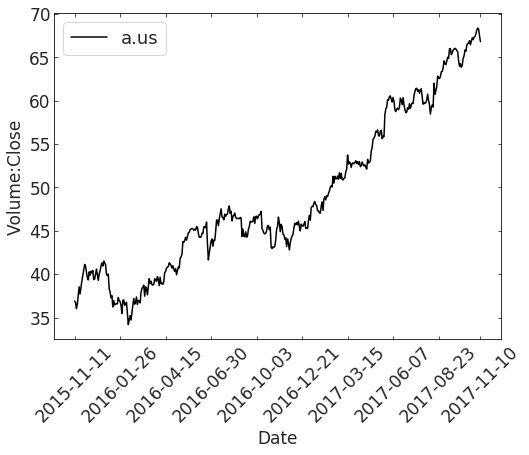

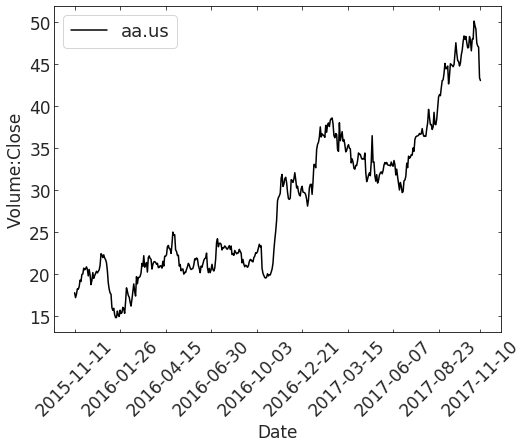

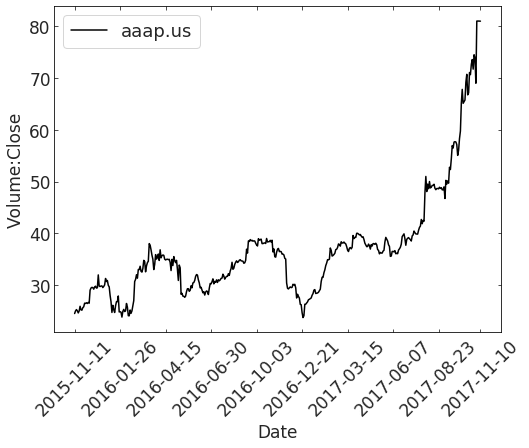

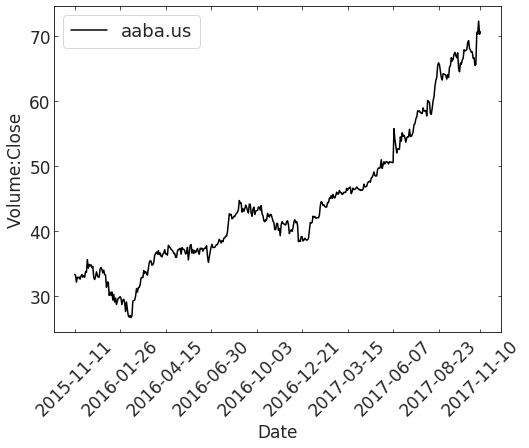

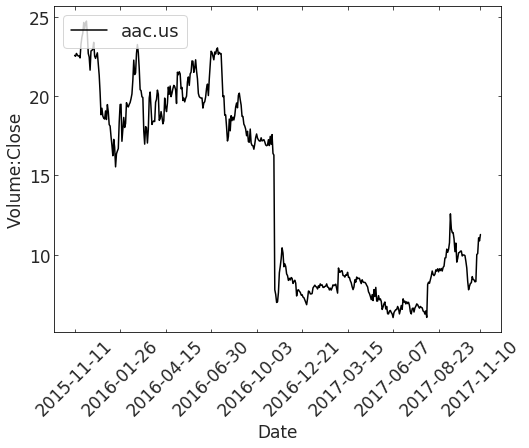

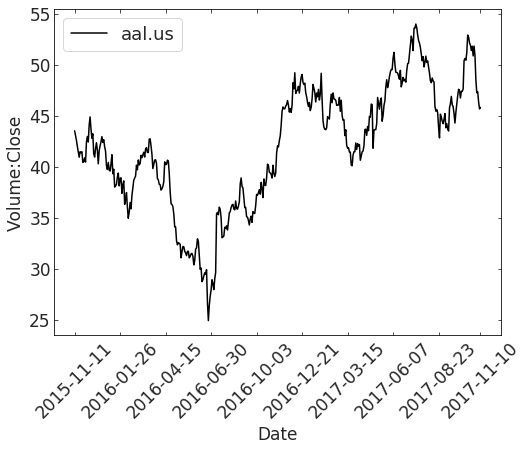

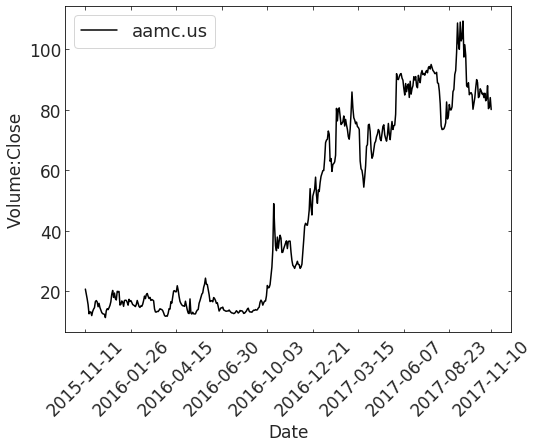

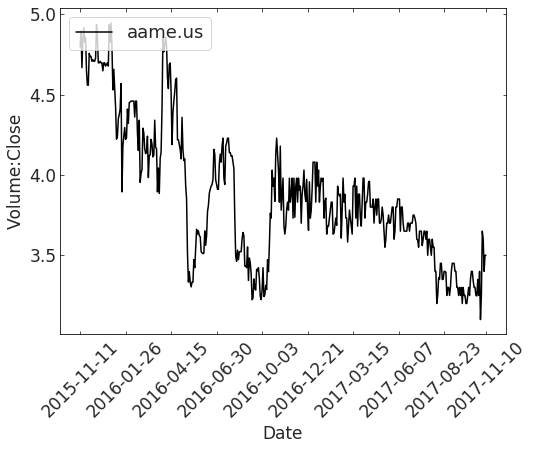

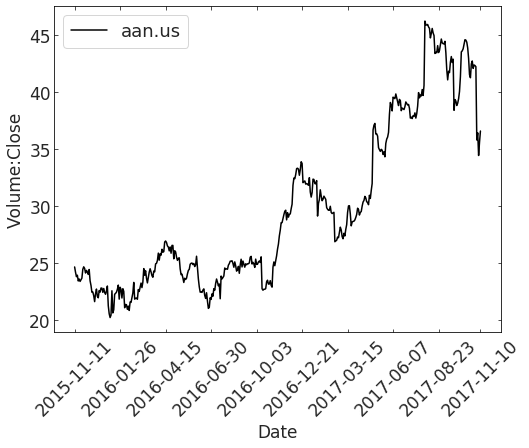

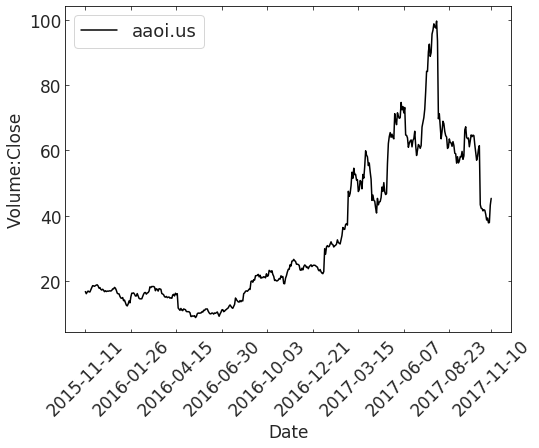

In [27]:
size = 17
def plotline(x,indices,color):
  color = color
  indices = indices
  ax = pl.figure(figsize=(8,6)).add_subplot(111)
  pl.plot(tss[x],color=color,label=x,)
  pl.xticks(indices,rotation=45,fontsize=size)
  plt.xticks(indices,rotation=45,fontsize=size)
  plt.yticks(fontsize=size)
  pl.xlabel("Date",fontsize = size)
  pl.ylabel("Volume:Close",fontsize = size)
  pl.legend(loc="upper left",fontsize=18)
  pl.show()

for i in tss.columns:
  indexa = tss[i].index[0::70]
  indexb = tss[i].index[-1]
  indices = list(index1)
  indices.append(index2)
  plotline(i,indices,'k')

Figure 1: Closing Volume for the first 10 (alphabetically sorted) companies from the stock list. Plotted from 2015 to the final data date (2017-11-10). The legend in the top left is the company. 

## visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

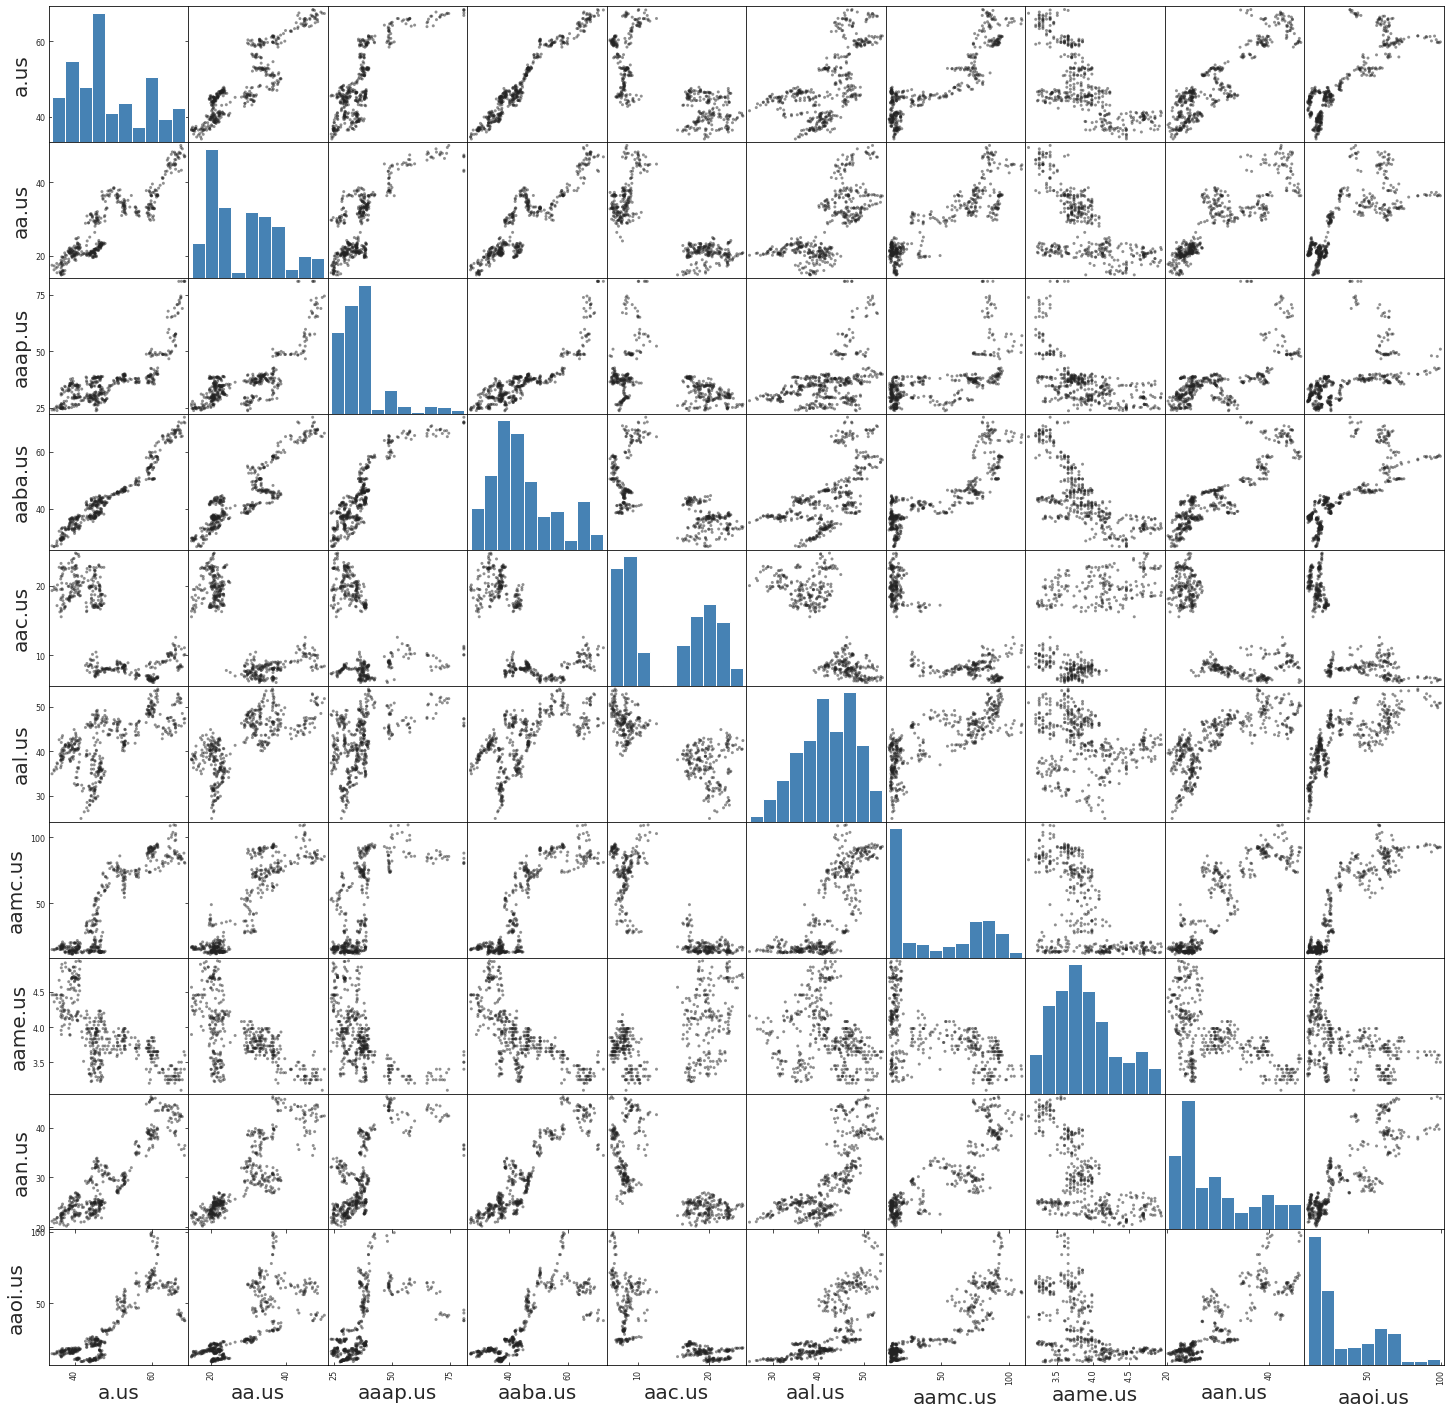

In [61]:
#need to reapply here after changing some parameters for previous plot
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")
scatter_matrix(tss, figsize=(25,25), color="#222222");

Figure 2: Plot of correlations for the different closing volumes for the 10 different companies, shown in scatter plots (histograms for the correlation with itself). Note that many of the companies show some correlation, either positive like aaba.us and a.us, or negative like aame.us and aaba.us.

In [29]:
tss.corr()

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
a.us,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239
aa.us,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459
aaap.us,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427
aaba.us,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059
aac.us,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147
aal.us,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505
aamc.us,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166
aame.us,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371
aan.us,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847
aaoi.us,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000


Numerical representation of the scatter plots shown above. Here we again see the correlation and anti-correlation for many company pairs. 

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


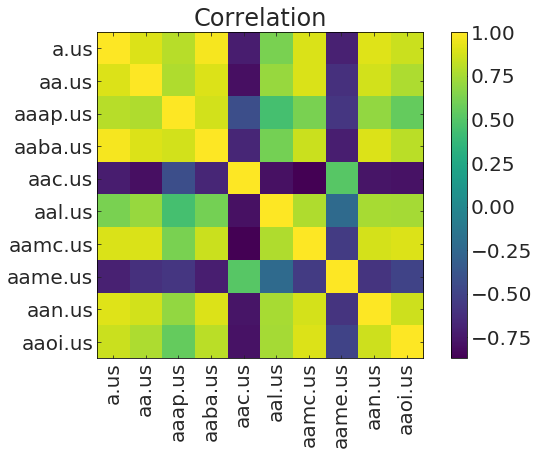

In [30]:
pl.imshow(tss.corr())
pl.colorbar()
pl.title("Correlation")
pl.xticks(range(len(tss.columns)), tss.columns, rotation=90)
pl.yticks(range(len(tss.columns)), tss.columns);

Figure 3: Another way of showing correlation. Here is becomes clearer that aac is anti-correlated with all but aame. aame is anti correlated with everyone but aac. This points towards an interesting relationship they have with the rest of the market and possible avenues to explore further. The a.us through aaba.us show fairly strong correlation with each other. 

## testing for stationarity
test if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [31]:
#second number is p-value
threshold = 0.05
for c in tss.columns:
  print(c, "is stationary:", sm.tsa.stattools.adfuller(tss[c])[1] < threshold)

a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False


## measure autocorrelation

plot the time series and its autocorrelation and partial autocorrelation function in blue if it is not stationary, in red if it is stationary

0.9711053061077951


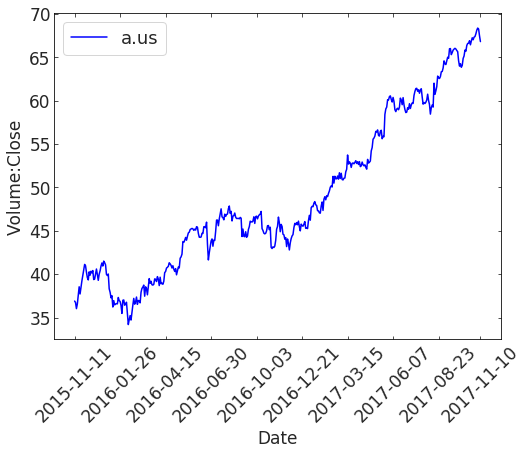

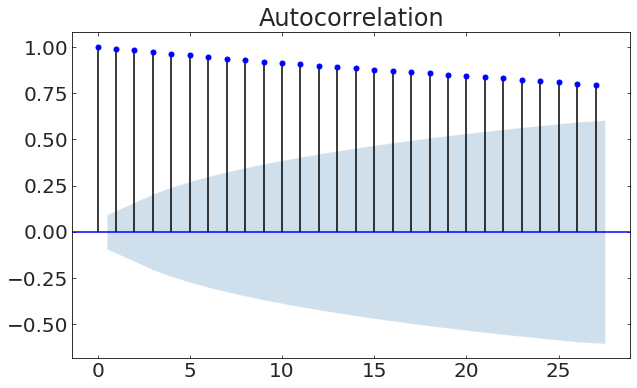

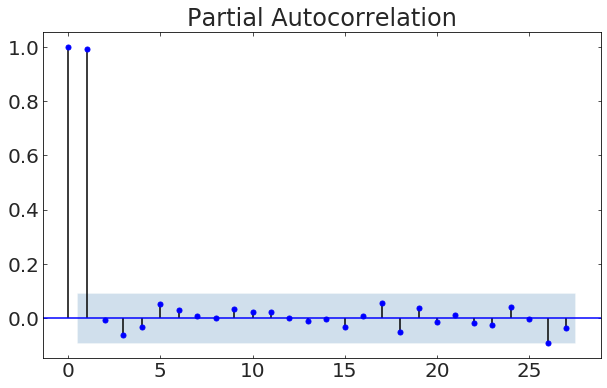

0.8615583755460212


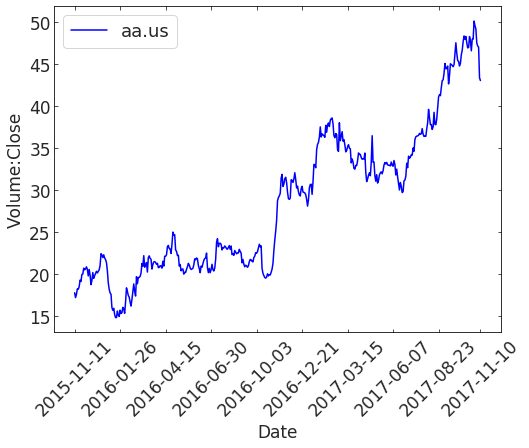

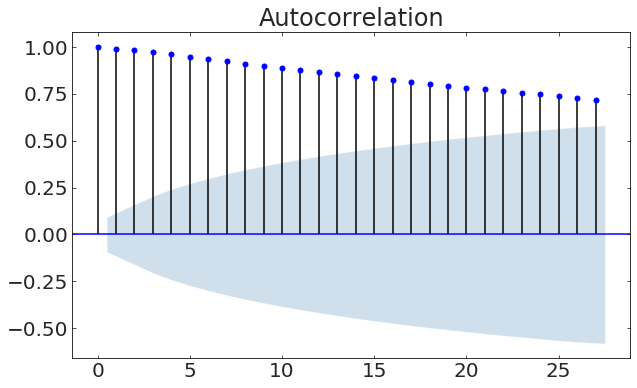

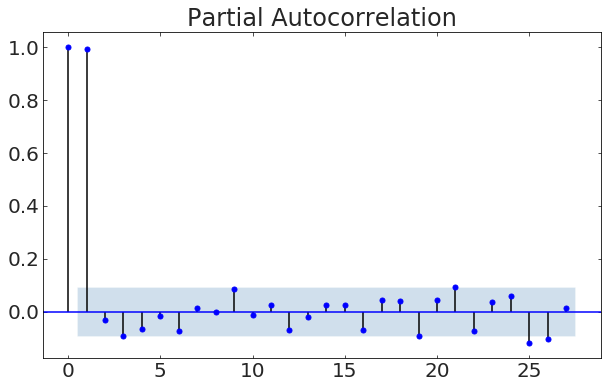

0.9990837483738163


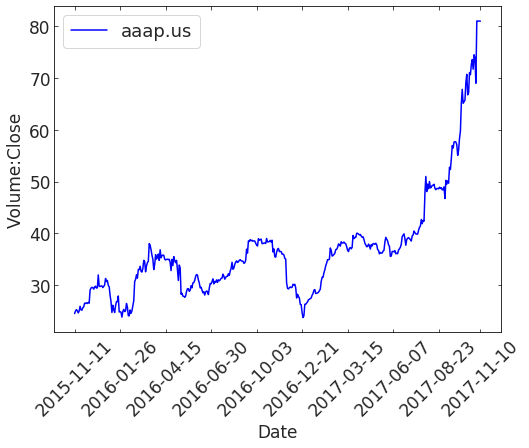

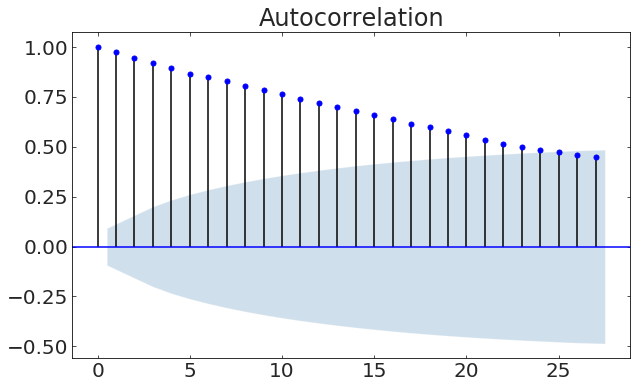

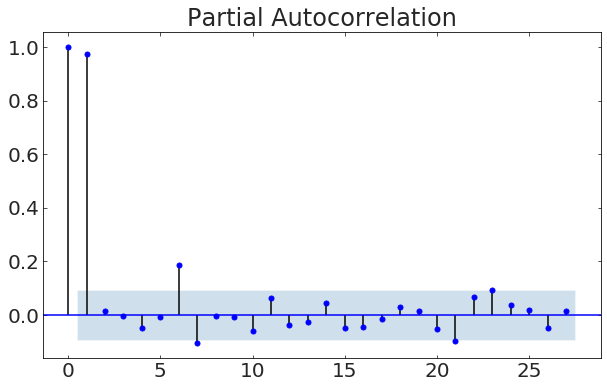

0.9976818114588439


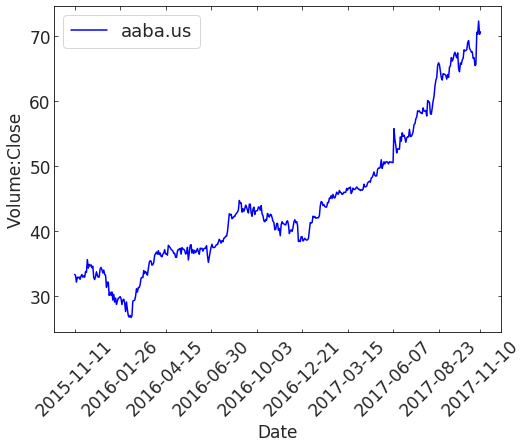

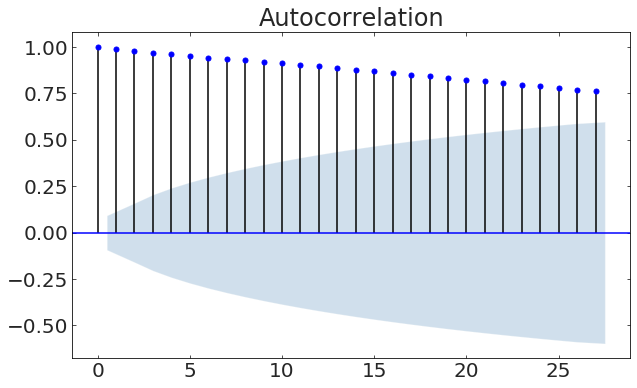

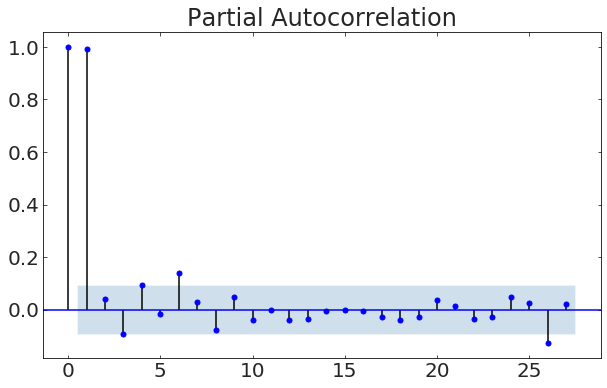

0.4980216243419859


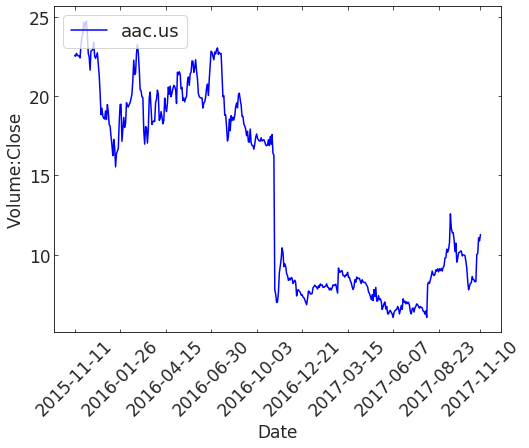

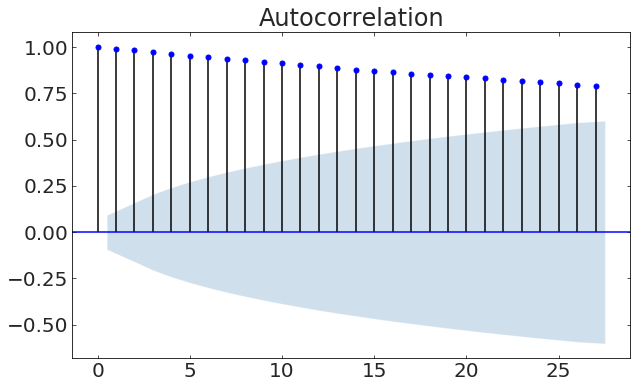

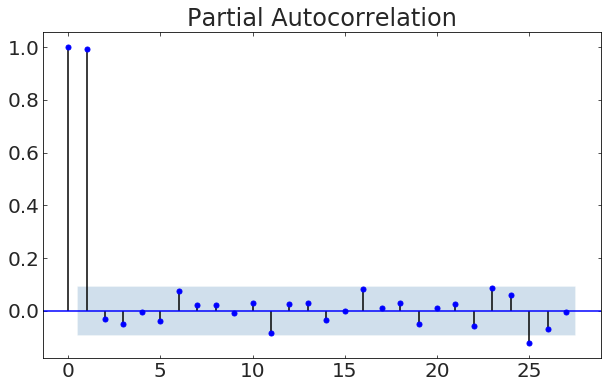

0.5075488991307308


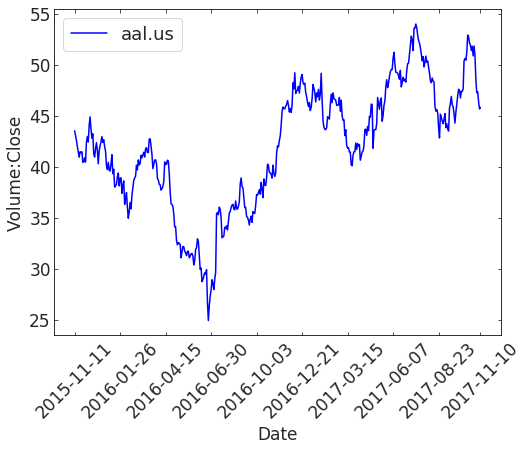

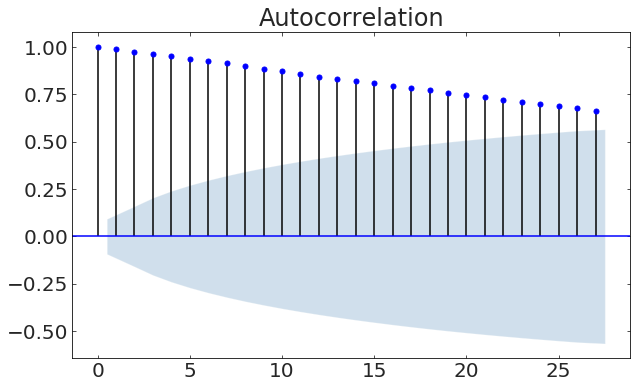

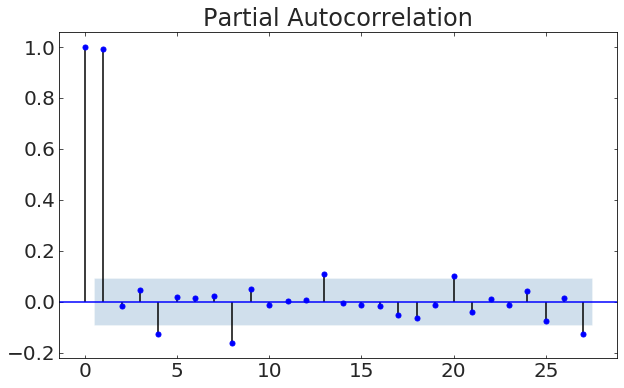

0.8176042911117105


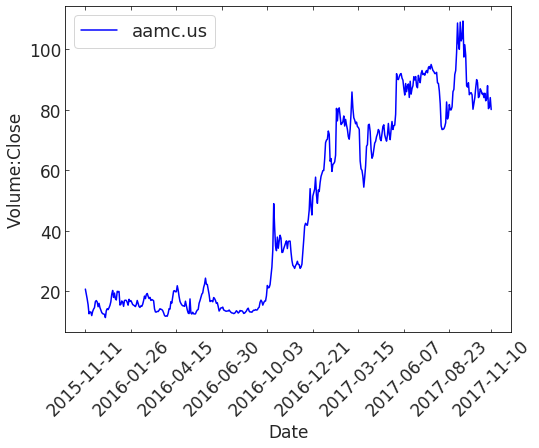

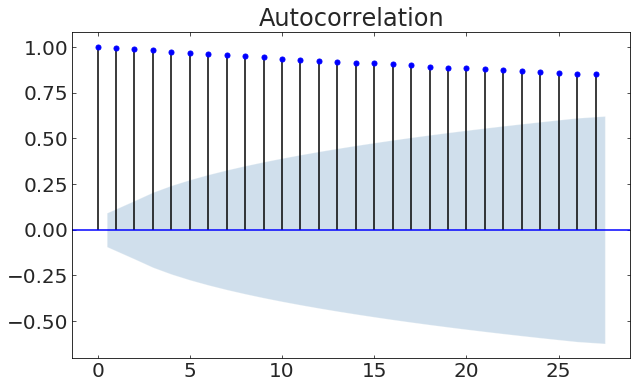

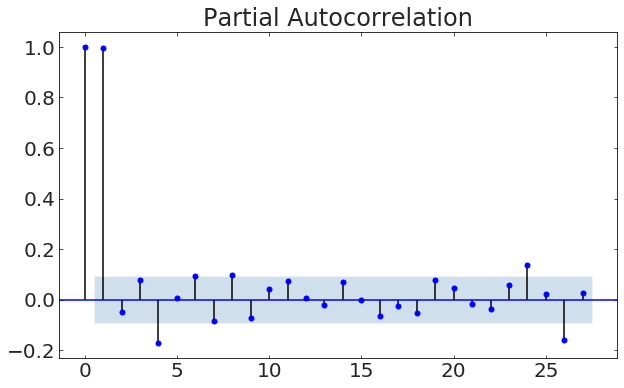

0.0395562412801309


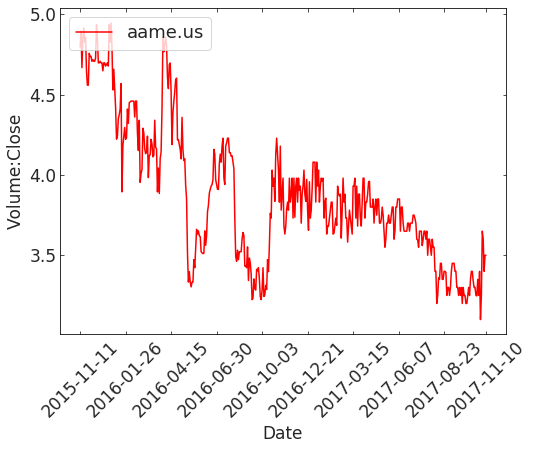

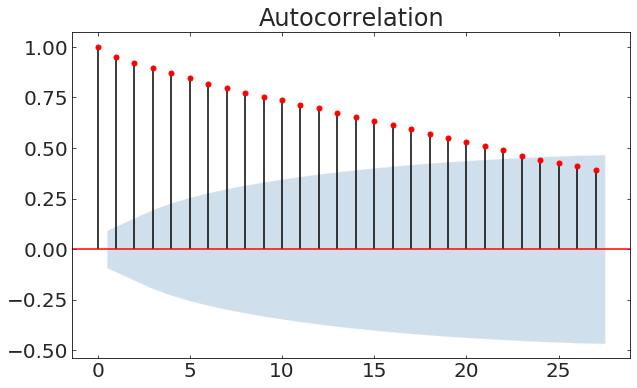

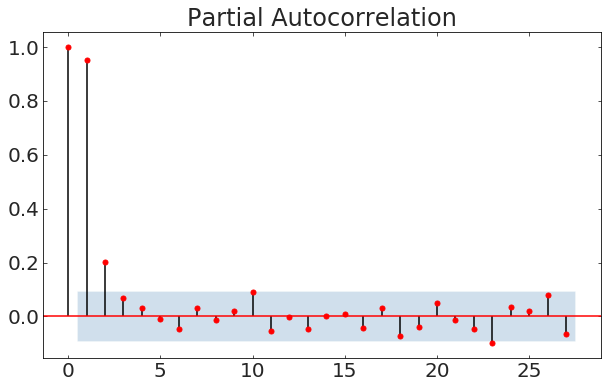

0.7303922201105058


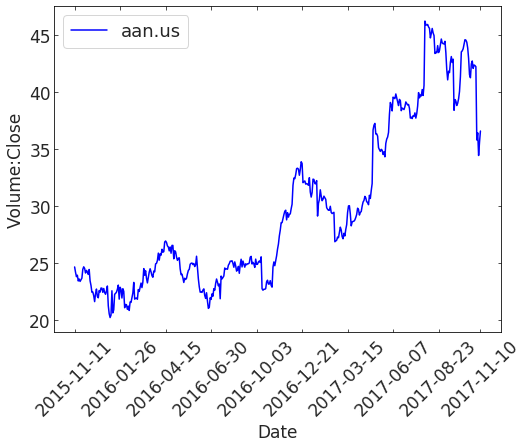

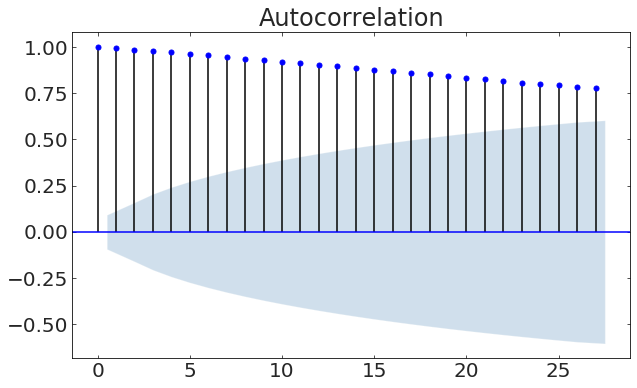

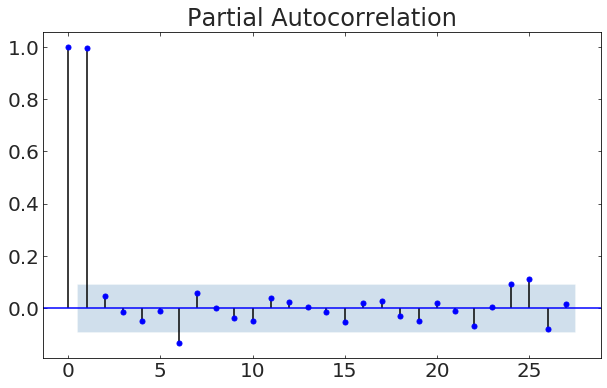

0.6114808797718178


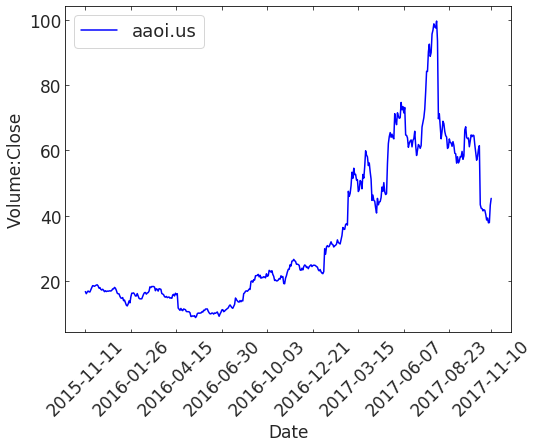

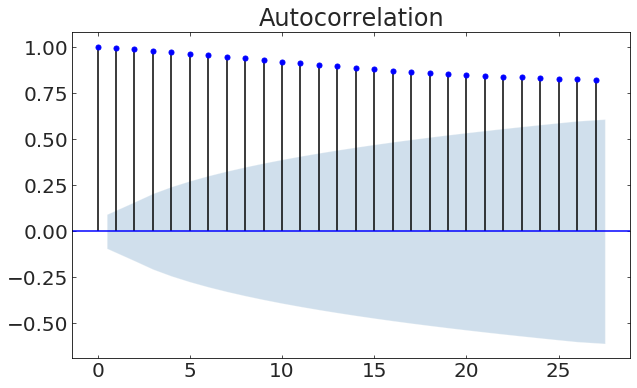

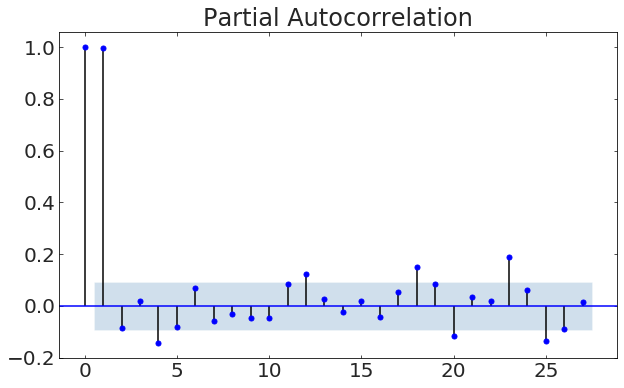

In [32]:
#True means stationary
#Autocorrelation: rk=∑i=1 to N-k (Yi−Y¯)(Yi+k−Y¯)/∑Ni=1(Yi−Y¯)^2 
#where Y¯ is average value. AC is measuring how function relates to itself at a minor temporal shift
#partial ACF is ACF at specific lag, with effect of smaller lags removed
threshold = 0.05
for i in tss.columns:
    #print(i, "is stationary:", sm.tsa.stattools.adfuller(tss[i])[1] < threshold)
    indexa = tss[i].index[0::70]
    indexb = tss[i].index[-1]
    indices = list(index1)
    indices.append(index2)
    print(sm.tsa.stattools.adfuller(tss[i])[1])
    if sm.tsa.stattools.adfuller(tss[i])[1] < threshold:
      plotline(i,indices,color = 'red')
      plot_acf(tss[i],color='red')
      pl.show()
      plot_pacf(tss[i],color='red')
      pl.show()

    else:
      plotline(i,indices,color='blue')
      plot_acf(tss[i],color='blue')
      pl.show()
      plot_pacf(tss[i],color='blue')
      pl.show()
      


Figure 4: Plots of data, autocorrelation, and partial autocorrelation. Graphs are in red if data is stationary. Autocorrelation measures how a data set is correlated with a time-lagged version of itself (does it relate to its past). The partial Autocorrelation is the Autocorrelation at some lag, with the lag steps in between removed. This gives us useful information in setting up p (the number of lags in ARMA). See for the stationary case that p = 0 or p = 2 look to be good guesses. 

# Fit one of the stationary time series with ARMA

To fit the model to the data use ```statsmodels.api.tsa.ARMA```

Inspect the function call as ```statsmodels.api.tsa.ARMA?```

The statsmodels models are generally fit into 2 phases: generating the model ```sm.tsa.ARMA(data, parameters)```, and then fitting it ```sm.tsa.ARMA(data, parameters).fit()```. 

For at least one model look at the model summary ```mod.summary()``` What are the best fit parameters based on this printed summary and thewir uncertainties? What is the value of the AIC(Aikiki Information Criterion)

See https://github.com/fedhere/A-Data-Driven-Evaluation-of-Delays-in-Criminal-Prosecution/blob/master/CodeExamples/ARMA/testingARMA_ARIMA.ipynb

## 1 Fit the model for a variety of parameters. You can run a nested loop to iterate over a range of p and q parameters
## 2. record the aic score for each fit
## 3. Find the best parameters to fit this time series with the AIC minimization criterion. For each model, after you fit it to the data, you can get the value of the AIC as ```model.aic```

In [0]:
#tsa.ARMA?

In [34]:
#11 are starting fit parameters
#order goes, for ARIMA parameters (p,d,q) for (AR,I,MA).
#ar is number of lag operations
#d is number of times raw observations are differenced
#ma is size of moving average window
mod = tsa.ARMA(tss[['aame.us']], (2,1))
fit = mod.fit()
print(fit.summary())
print("")
print("The Parameters are:")
print(fit.params)
print("With Uncertainty")
print(fit.bse)
print("And an AIC value of " + str(fit.aic))

                              ARMA Model Results                              
Dep. Variable:                aame.us   No. Observations:                  447
Model:                     ARMA(2, 1)   Log Likelihood                 301.140
Method:                       css-mle   S.D. of innovations              0.123
Date:                Wed, 26 Feb 2020   AIC                           -592.279
Time:                        04:44:07   BIC                           -571.766
Sample:                             0   HQIC                          -584.192
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9297      0.209     18.760      0.000       3.519       4.340
ar.L1.aame.us     1.0579      0.188      5.634      0.000       0.690       1.426
ar.L2.aame.us    -0.0744      0.182     

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ar paramter of 1.058, ma parameter value of -.342. 
p (number of lags) of 2
q (how far the moving average goes back) of 1


In [35]:
#in order of L(i), initial, AIC.
aics=[[]]
for i in range(0,4):
  for j in range(0,7):
    try:
      #print(i,j)
      mod = tsa.ARMA(tss[['aame.us']], (i,j))
      fit = mod.fit()
      #print(fit.aic)
      aics.append((i,j,fit.aic))
    except ValueError:
      aics.append((i,j,np.nan))
aics.remove(aics[0])
print(aics)
#mod = tsa.ARMA(tss[['aame.us']], (2,0))
#fit = mod.fit()
#print(fit.summary())
#print("")
#print("The Parameters are:")
#print(fit.params)
#print("With Uncertainty")
#print(fit.bse)
#print("And an AIC value of " + str(fit.aic))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

[(0, 0, 522.0196275870962), (0, 1, 106.23491009614554), (0, 2, -130.21340756720542), (0, 3, -245.70555256615467), (0, 4, -323.71484051098173), (0, 5, -388.5639139943787), (0, 6, -415.46724424081935), (1, 0, -568.1307057346728), (1, 1, -594.1149218798437), (1, 2, -592.2582741547974), (1, 3, -590.4374948591164), (1, 4, -588.5536108645749), (1, 5, -586.5542698237441), (1, 6, -585.8280234116821), (2, 0, -591.4727386903519), (2, 1, -592.2792517067387), (2, 2, -590.1748845133147), (2, 3, -588.4783451985861), (2, 4, nan), (2, 5, nan), (2, 6, nan), (3, 0, -591.5466830206851), (3, 1, -590.3828867548807), (3, 2, -588.4252971636943), (3, 3, -593.8307998561875), (3, 4, nan), (3, 5, nan), (3, 6, nan)]


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [36]:
aics = np.array(aics)
print(aics)
print(aics[:,2])
#print(np.nanargmin(aics[:,2]))
print(aics[np.nanargmin(aics[:,2])])


[[   0.            0.          522.01962759]
 [   0.            1.          106.2349101 ]
 [   0.            2.         -130.21340757]
 [   0.            3.         -245.70555257]
 [   0.            4.         -323.71484051]
 [   0.            5.         -388.56391399]
 [   0.            6.         -415.46724424]
 [   1.            0.         -568.13070573]
 [   1.            1.         -594.11492188]
 [   1.            2.         -592.25827415]
 [   1.            3.         -590.43749486]
 [   1.            4.         -588.55361086]
 [   1.            5.         -586.55426982]
 [   1.            6.         -585.82802341]
 [   2.            0.         -591.47273869]
 [   2.            1.         -592.27925171]
 [   2.            2.         -590.17488451]
 [   2.            3.         -588.4783452 ]
 [   2.            4.                   nan]
 [   2.            5.                   nan]
 [   2.            6.                   nan]
 [   3.            0.         -591.54668302]
 [   3.   

In [37]:
#passing in the initial parameters that are used to get the minimum AIC. In this case p = 1, q = 1
minaic = aics[np.nanargmin(aics[:,2])]
mod = tsa.ARMA(tss[['aame.us']], (int(minaic[0]),int(minaic[1])))
fit = mod.fit()
print(fit.summary())
print("")
print("Parameters of Fit with lowest AIC ")
print(fit.params)
print("")
print("With Uncertainties ")
print("")
print(fit.bse)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                aame.us   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                 301.057
Method:                       css-mle   S.D. of innovations              0.123
Date:                Wed, 26 Feb 2020   AIC                           -594.115
Time:                        04:44:14   BIC                           -577.705
Sample:                             0   HQIC                          -587.645
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9275      0.204     19.247      0.000       3.528       4.327
ar.L1.aame.us     0.9811      0.010    100.057      0.000       0.962       1.000
ma.L1.aame.us    -0.2706      0.049     

In [0]:
#print(fit.arparams)
#print(fit.maparams)
#print(fit.params)

ar parameter of .981, ma parameter of -.27. See associated uncertainties. AIC of -594.115

for p = 1, q = 1

## 4. predict the in-set and the future alues

you can use ```mod.plot_predict()``` to visualize them

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


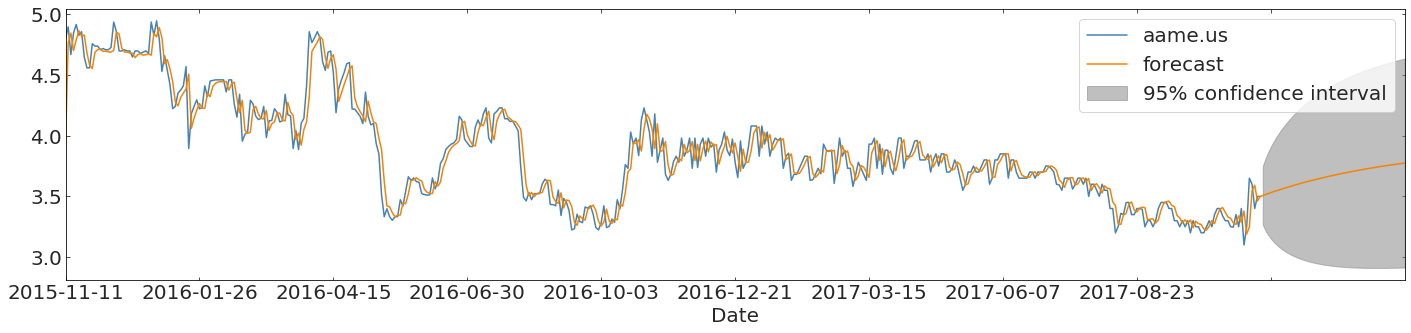

In [39]:
ax = tss[['aame.us']].plot(figsize=(24,5))
fit.plot_predict(end=500, plot_insample=False, ax=ax);

Figure 5: plot of the aame.us data in blue, with the prediction in orange. The prediction was formed through stats models ARMA fit, using initial parameters that produced final parameters with minimized AIC. The confidence interval, similar to the ARMA example in the slides, expands quickly once data runs out. Note this data was stationary and so suitable to ARMA analysis.  

# 3.5 what are the coefficients of the best fit model? what do they mean? 


In [40]:
fit.params

const            3.927505
ar.L1.aame.us    0.981141
ma.L1.aame.us   -0.270580
dtype: float64

The three parameters here are the ar parameter, .981141, the ma parameter, -.270580, and the constant 3.927505.

The constant I am least sure about. It relates to the mean of the model, and cursory online investigation appears to show a relationship of: constant = mean(1 - arparams.sum())

the ar value is the coefficient (ai) in front of the lag step of the equation.
The ma value is the coefficient (theta) in front of the previous steps noise that is subtracted from the value. 

#  choose 2 non stationary time series in the set that are not correlated and repeat steps 3.1-3.4 with the ARIMA model

choose a value of the integration order that is reasonable ...

In [41]:
#print(tss.columns)
#print(tss['a.us'])
#tss['a.us'].corrwith(tss['a.us'], axis = 0) 
a = pd.DataFrame(tss['a.us'])
aa = pd.DataFrame(tss['aa.us'])
aaap = pd.DataFrame(tss['aaap.us'])
aal = pd.DataFrame(tss['aal.us'])
aaba = pd.DataFrame(tss['aaba.us'])
aac = pd.DataFrame(tss['aac.us'])
aamc = pd.DataFrame(tss['aamc.us'])
aame = pd.DataFrame(tss['aame.us'])
aan = pd.DataFrame(tss['aan.us'])
aaoi = pd.DataFrame(tss['aaoi.us'])
#print(a)
#print(a.corrwith(aa,axis=1))
print(aaap.apply(lambda x: aac.corrwith(x)))

         aaap.us
aac.us -0.423021


In [42]:
mod = tsa.ARIMA(tss[['aaap.us']], (2,1,1))
fit = mod.fit()
print(fit.summary())
print("")
print("The Parameters are:")
print(fit.params)
print("With Uncertainty")
print(fit.bse)
print("And an AIC value of " + str(fit.aic))

                             ARIMA Model Results                              
Dep. Variable:              D.aaap.us   No. Observations:                  446
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -723.688
Method:                       css-mle   S.D. of innovations              1.226
Date:                Wed, 26 Feb 2020   AIC                           1457.376
Time:                        04:44:15   BIC                           1477.878
Sample:                             1   HQIC                          1465.460
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1268      0.049      2.564      0.011       0.030       0.224
ar.L1.D.aaap.us    -0.6572      0.218     -3.010      0.003      -1.085      -0.229
ar.L2.D.aaap.us    -0.1459      

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [43]:
aics=[[]]
for i in range(0,4):
  for j in range(0,7):
    try:
      #print(i,j)
      mod = tsa.ARIMA(tss[['aaap.us']], (i,1,j))
      fit = mod.fit()
      #print(fit.aic)
      aics.append((i,j,fit.aic))
    except ValueError:
      aics.append((i,j,np.nan))
aics.remove(aics[0])
print(aics)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

[(0, 0, 1461.9706829051675), (0, 1, 1457.1758182233466), (0, 2, 1458.9202939693328), (0, 3, 1456.7879862796633), (0, 4, 1458.4913381735341), (0, 5, 1459.9379252658098), (0, 6, 1461.0822100590694), (1, 0, 1457.744831625364), (1, 1, 1459.08244079956), (1, 2, nan), (1, 3, nan), (1, 4, nan), (1, 5, nan), (1, 6, nan), (2, 0, 1458.0558728607311), (2, 1, 1457.3763509841972), (2, 2, 1461.439188598327), (2, 3, nan), (2, 4, nan), (2, 5, nan), (2, 6, nan), (3, 0, 1456.0668345762426), (3, 1, 1457.6162441716237), (3, 2, 1454.7638369591766), (3, 3, 1448.3755666965048), (3, 4, nan), (3, 5, nan), (3, 6, nan)]


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [44]:
aics = np.array(aics)
print(aics)
print(aics[:,2])
print(aics[np.nanargmin(aics[:,2])])

[[0.00000000e+00 0.00000000e+00 1.46197068e+03]
 [0.00000000e+00 1.00000000e+00 1.45717582e+03]
 [0.00000000e+00 2.00000000e+00 1.45892029e+03]
 [0.00000000e+00 3.00000000e+00 1.45678799e+03]
 [0.00000000e+00 4.00000000e+00 1.45849134e+03]
 [0.00000000e+00 5.00000000e+00 1.45993793e+03]
 [0.00000000e+00 6.00000000e+00 1.46108221e+03]
 [1.00000000e+00 0.00000000e+00 1.45774483e+03]
 [1.00000000e+00 1.00000000e+00 1.45908244e+03]
 [1.00000000e+00 2.00000000e+00            nan]
 [1.00000000e+00 3.00000000e+00            nan]
 [1.00000000e+00 4.00000000e+00            nan]
 [1.00000000e+00 5.00000000e+00            nan]
 [1.00000000e+00 6.00000000e+00            nan]
 [2.00000000e+00 0.00000000e+00 1.45805587e+03]
 [2.00000000e+00 1.00000000e+00 1.45737635e+03]
 [2.00000000e+00 2.00000000e+00 1.46143919e+03]
 [2.00000000e+00 3.00000000e+00            nan]
 [2.00000000e+00 4.00000000e+00            nan]
 [2.00000000e+00 5.00000000e+00            nan]
 [2.00000000e+00 6.00000000e+00         

In [45]:
minaic = aics[np.nanargmin(aics[:,2])]
mod = tsa.ARIMA(tss[['aaap.us']], (int(minaic[0]),1,int(minaic[1])))
fit = mod.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [46]:
print(fit.summary())
print("")
print("Parameters of Fit with lowest AIC ")
print(fit.params)
print("")
print("With Uncertainties ")
print("")
print(fit.bse)

                             ARIMA Model Results                              
Dep. Variable:              D.aaap.us   No. Observations:                  446
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -716.188
Method:                       css-mle   S.D. of innovations              1.204
Date:                Wed, 26 Feb 2020   AIC                           1448.376
Time:                        04:44:20   BIC                           1481.178
Sample:                             1   HQIC                          1461.309
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1651      0.124      1.329      0.185      -0.078       0.409
ar.L1.D.aaap.us    -0.2328      0.050     -4.659      0.000      -0.331      -0.135
ar.L2.D.aaap.us     0.2399      

Found for p =3, d =1, q = 3
Parameters mean same thing as above, but note that now we have a d value initially set. d is the number of times the raw observations are differenced (subtracting the previous value y(t-1)). 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


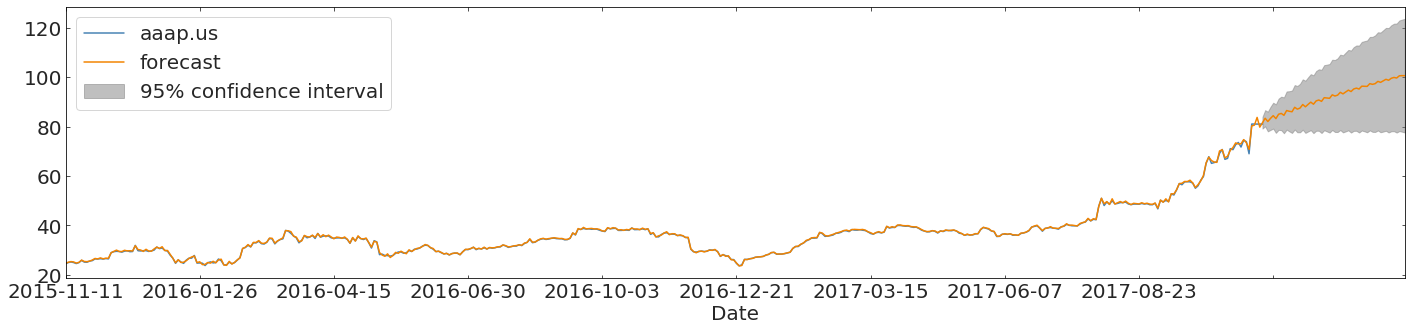

In [47]:
ax = tss[['aaap.us']].plot(figsize=(24,5))
fit.plot_predict(end=500, plot_insample=False, ax=ax);


Figure 6. A strong prediction graph for aaap, using the minimum AIC parameters with q = 3, d = 1, p = 3. Confidence interval doesn't spread out as much. 

In [48]:
mod = tsa.ARIMA(tss[['aac.us']], (2,1,1))
fit = mod.fit()
print(fit.summary())
print("")
print("The Parameters are:")
print(fit.params)
print("With Uncertainty")
print(fit.bse)
print("And an AIC value of " + str(fit.aic))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.aac.us   No. Observations:                  446
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -454.518
Method:                       css-mle   S.D. of innovations              0.670
Date:                Wed, 26 Feb 2020   AIC                            919.035
Time:                        04:44:20   BIC                            939.537
Sample:                             1   HQIC                           927.119
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0253      0.033     -0.757      0.449      -0.091       0.040
ar.L1.D.aac.us    -0.8262      0.115     -7.215      0.000      -1.051      -0.602
ar.L2.D.aac.us     0.0664      0.049

In [49]:
aics=[[]]
for i in range(0,4):
  for j in range(0,7):
    try:
      #print(i,j)
      mod = tsa.ARIMA(tss[['aac.us']], (i,1,j))
      fit = mod.fit()
      #print(fit.aic)
      aics.append((i,j,fit.aic))
    except ValueError:
      aics.append((i,j,np.nan))
aics.remove(aics[0])
print(aics)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

[(0, 0, 916.852573073977), (0, 1, 918.637282053114), (0, 2, 919.9289210806844), (0, 3, 921.9264179601162), (0, 4, 923.0703745093141), (0, 5, 921.2583915086859), (0, 6, 922.8594218633834), (1, 0, 918.6196162633228), (1, 1, nan), (1, 2, nan), (1, 3, nan), (1, 4, nan), (1, 5, nan), (1, 6, nan), (2, 0, 919.8853449684545), (2, 1, 919.0354577367683), (2, 2, 916.7713034940161), (2, 3, nan), (2, 4, nan), (2, 5, nan), (2, 6, nan), (3, 0, 921.8408927603098), (3, 1, 921.0046207349903), (3, 2, 920.9758973423704), (3, 3, nan), (3, 4, nan), (3, 5, nan), (3, 6, nan)]


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [50]:
aics = np.array(aics)
print(aics)
print(aics[:,2])
print(aics[np.nanargmin(aics[:,2])])

[[  0.           0.         916.85257307]
 [  0.           1.         918.63728205]
 [  0.           2.         919.92892108]
 [  0.           3.         921.92641796]
 [  0.           4.         923.07037451]
 [  0.           5.         921.25839151]
 [  0.           6.         922.85942186]
 [  1.           0.         918.61961626]
 [  1.           1.                  nan]
 [  1.           2.                  nan]
 [  1.           3.                  nan]
 [  1.           4.                  nan]
 [  1.           5.                  nan]
 [  1.           6.                  nan]
 [  2.           0.         919.88534497]
 [  2.           1.         919.03545774]
 [  2.           2.         916.77130349]
 [  2.           3.                  nan]
 [  2.           4.                  nan]
 [  2.           5.                  nan]
 [  2.           6.                  nan]
 [  3.           0.         921.84089276]
 [  3.           1.         921.00462073]
 [  3.           2.         920.97

In [51]:
minaic = aics[np.nanargmin(aics[:,2])]
mod = tsa.ARIMA(tss[['aac.us']], (int(minaic[0]),1,int(minaic[1])))
fit = mod.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [52]:
print(fit.summary())
print("")
print("Parameters of Fit with lowest AIC ")
print(fit.params)
print("")
print("With Uncertainties ")
print("")
print(fit.bse)

                             ARIMA Model Results                              
Dep. Variable:               D.aac.us   No. Observations:                  446
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -452.386
Method:                       css-mle   S.D. of innovations              0.664
Date:                Wed, 26 Feb 2020   AIC                            916.771
Time:                        04:44:25   BIC                            941.373
Sample:                             1   HQIC                           926.471
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0257      0.033     -0.784      0.434      -0.090       0.039
ar.L1.D.aac.us     1.2757      0.019     66.613      0.000       1.238       1.313
ar.L2.D.aac.us    -0.9602      0.015

For p = 2, q = 2, d = 1, AIC = 916.77

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


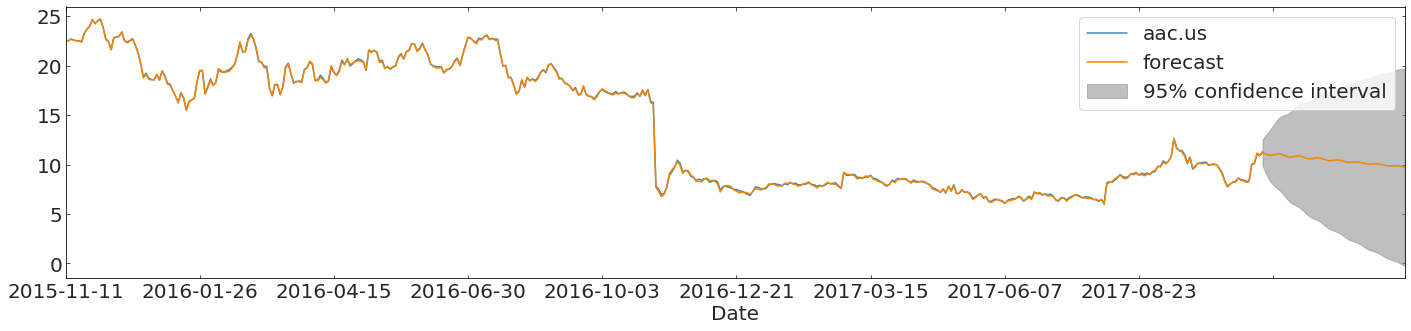

In [53]:
ax = tss[['aac.us']].plot(figsize=(24,5))
fit.plot_predict(end=500, plot_insample=False, ax=ax);

Figure 7. Prediction graph for aac.us. Confidence interval spreads out a lot. 

# Redo the fit to one of the non-stsationary lightcurves with a different order of integration and compare the results. What do the coefficients tell you?

In [54]:
#d > 2 not supported
mod = tsa.ARIMA(tss[['aac.us']], (2,2,1))
fit = mod.fit()
print(fit.summary())
print("")
print("The Parameters are:")
print(fit.params)
print("With Uncertainty")
print(fit.bse)
print("And an AIC value of " + str(fit.aic))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D2.aac.us   No. Observations:                  445
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -458.161
Method:                       css-mle   S.D. of innovations              0.673
Date:                Wed, 26 Feb 2020   AIC                            926.321
Time:                        04:44:25   BIC                            946.812
Sample:                             2   HQIC                           934.401
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0002      0.000      0.698      0.486      -0.000       0.001
ar.L1.D2.aac.us     0.0232      0.047      0.489      0.625      -0.070       0.116
ar.L2.D2.aac.us     0.0417      

In [55]:
aics=[[]]
for i in range(0,4):
  for j in range(0,7):
    try:
      #print(i,j)
      mod = tsa.ARIMA(tss[['aac.us']], (i,2,j))
      fit = mod.fit()
      #print(fit.aic)
      aics.append((i,j,fit.aic))
    except ValueError:
      aics.append((i,j,np.nan))
aics.remove(aics[0])
print(aics)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

[(0, 0, 1213.7557050397108), (0, 1, 923.3518263140995), (0, 2, 925.1156531035879), (0, 3, nan), (0, 4, nan), (0, 5, nan), (0, 6, nan), (1, 0, 1082.5014728289184), (1, 1, 925.0957310539613), (1, 2, 925.347544754607), (1, 3, 925.4571834273596), (1, 4, 927.4136828861349), (1, 5, 928.2108824174095), (1, 6, nan), (2, 0, 1041.4405699554304), (2, 1, 926.3212633760818), (2, 2, 925.4932204439174), (2, 3, 927.0771214163149), (2, 4, 927.8636360668878), (2, 5, 930.147344305404), (2, 6, 928.3477852739263), (3, 0, 1010.7297225929841), (3, 1, 928.2878856150026), (3, 2, 927.4706312095823), (3, 3, 928.7141529330107), (3, 4, 924.5448805812699), (3, 5, 929.7804578371487), (3, 6, 926.8349824089958)]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


The above cell (finding best initial p,q values) took a considerably longer amount of time for d = 2 than for d = 1

In [56]:
aics = np.array(aics)
print(aics)
print(aics[:,2])
print(aics[np.nanargmin(aics[:,2])])

[[0.00000000e+00 0.00000000e+00 1.21375571e+03]
 [0.00000000e+00 1.00000000e+00 9.23351826e+02]
 [0.00000000e+00 2.00000000e+00 9.25115653e+02]
 [0.00000000e+00 3.00000000e+00            nan]
 [0.00000000e+00 4.00000000e+00            nan]
 [0.00000000e+00 5.00000000e+00            nan]
 [0.00000000e+00 6.00000000e+00            nan]
 [1.00000000e+00 0.00000000e+00 1.08250147e+03]
 [1.00000000e+00 1.00000000e+00 9.25095731e+02]
 [1.00000000e+00 2.00000000e+00 9.25347545e+02]
 [1.00000000e+00 3.00000000e+00 9.25457183e+02]
 [1.00000000e+00 4.00000000e+00 9.27413683e+02]
 [1.00000000e+00 5.00000000e+00 9.28210882e+02]
 [1.00000000e+00 6.00000000e+00            nan]
 [2.00000000e+00 0.00000000e+00 1.04144057e+03]
 [2.00000000e+00 1.00000000e+00 9.26321263e+02]
 [2.00000000e+00 2.00000000e+00 9.25493220e+02]
 [2.00000000e+00 3.00000000e+00 9.27077121e+02]
 [2.00000000e+00 4.00000000e+00 9.27863636e+02]
 [2.00000000e+00 5.00000000e+00 9.30147344e+02]
 [2.00000000e+00 6.00000000e+00 9.283477

In [63]:
minaic = aics[np.nanargmin(aics[:,2])]
mod = tsa.ARIMA(tss[['aac.us']], (int(minaic[0]),2,int(minaic[1])))
fit = mod.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [64]:
print(fit.summary())
print("")
print("Parameters of Fit with lowest AIC ")
print(fit.params)
print("")
print("With Uncertainties ")
print("")
print(fit.bse)

                             ARIMA Model Results                              
Dep. Variable:              D2.aac.us   No. Observations:                  445
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -458.676
Method:                       css-mle   S.D. of innovations              0.674
Date:                Wed, 26 Feb 2020   AIC                            923.352
Time:                        05:08:33   BIC                            935.646
Sample:                             2   HQIC                           928.200
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0002      0.000      0.744      0.457      -0.000       0.001
ma.L1.D2.aac.us    -1.0000      0.007   -140.972      0.000      -1.014      -0.986
                                

for p = 0, q = 1, d = 2. AIC = 923.352, which is slightly higher than with d = 1 case. 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


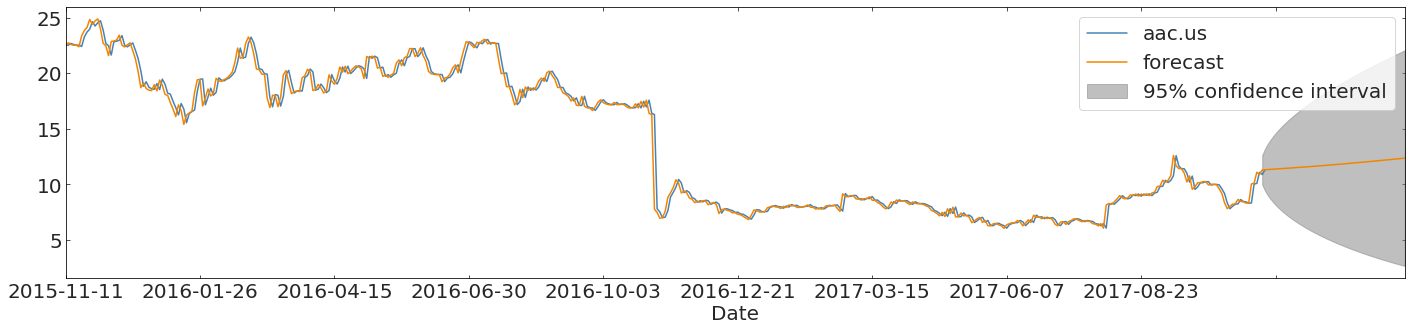

In [65]:
ax = tss[['aac.us']].plot(figsize=(24,5))
fit.plot_predict(end=500, plot_insample=False, ax=ax);

Figure 8. Another prediction for aac.us, this time finding the best p, q and fitting parameters with d = 2 instead of d =1. Note that this is not as good a fit, evidenced by the larger AIC, the visual discrepancy displayed. However, there was a signficant decrease in the number of parameters used in the d = 2 case. 